## A. Matice setrvačnosti a hlavní momenty setrvačnosti

### Těleso je tvořeno třemi kovovými koulemi o hmotnostech m1=1 kg, m2=2 kg a m3=3 kg navzájem spojenými do tvaru trojúhelníku. Vzdálenost koulí 1-2=1 m, vzdálenost koulí 2-3=0.5 m a úhel 1-2-3=120o.

### 1. Spočtěte střed hmotnosti tohoto tělesa. 

In [1]:
import numpy as np

l_12, l_23 = 1.0, 0.5     # kg
m_1, m_2, m_3 = 1.0, 2.0, 3.0 # m

r_1 = np.array([-l_12, 0, 0], dtype= 'f')  
r_2 = np.array([0, 0, 0], dtype= 'f')  
r_3 = np.array([l_23 * np.cos(np.radians(60)), l_23 * np.sin(np.radians(60)), 0], dtype= 'f')

stred_hmotnosti = (m_1 * r_1 + m_2 * r_2 + m_3 * r_3) / (m_1 + m_2 + m_3)
stred_hmotnosti

array([-0.04166667,  0.21650635,  0.        ], dtype=float32)

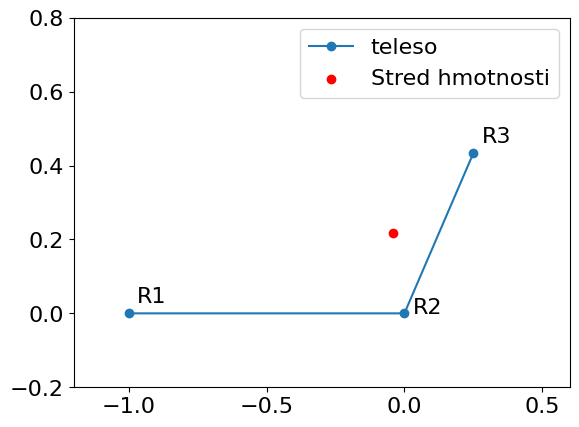

In [2]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
plt.plot([r_1[0], r_2[0], r_3[0]], [r_1[1], r_2[1], r_3[1]], marker='o', linestyle='-', label = 'teleso')
plt.scatter(stred_hmotnosti[0], stred_hmotnosti[1], color = 'red', label = 'Stred hmotnosti')
plt.annotate("R1", [r_1[0] + 0.03, r_1[1] + 0.03 ] )
plt.annotate("R2", [r_2[0] + 0.03, r_2[1] ])
plt.annotate("R3", [r_3[0] + 0.03, r_3[1] + 0.03 ])
plt.xlim(-1.2, 0.6)
plt.ylim (-0.2, 0.8)
plt.legend()
plt.show()

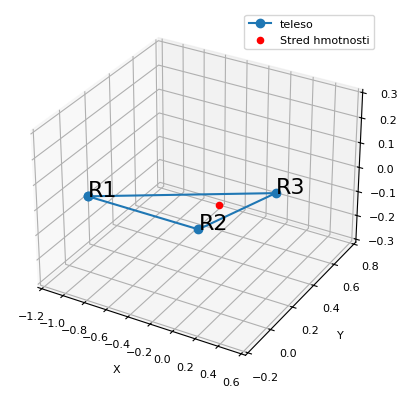

In [3]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 8})

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot([r_1[0], r_2[0], r_3[0], r_1[0]], 
        [r_1[1], r_2[1], r_3[1], r_1[1]], 
        [r_1[2], r_2[2], r_3[2], r_1[2]], marker='o', linestyle='-', label='teleso')

ax.scatter(stred_hmotnosti[0], stred_hmotnosti[1], stred_hmotnosti[2], color='red', label='Stred hmotnosti')

ax.text(r_1[0], r_1[1], r_1[2], "R1", fontsize = '16')
ax.text(r_2[0], r_2[1], r_2[2], "R2", fontsize = '16')
ax.text(r_3[0], r_3[1], r_3[2], "R3", fontsize = '16')

ax.set_xlim([-1.2, 0.6])  
ax.set_ylim([-0.2, 0.8])  
ax.set_zlim([-0.3, 0.3])  
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

### 2. Spočtěte prvky matice setrvačnosti vzhledem ke středu hmotnosti.

$ Dxy =Dyx, Dxz = Dzx, Dyz = Dzy $

souřadnice $ x_i, y_i $ každé koule vzhledem ke středu hmotnosti jsou:


In [86]:
r = [r_1, r_2, r_3]
r_prime = []
for r_i in r:
    r_i = r_i - stred_hmotnosti
    r_prime.append(r_i)


I_x, I_y, I_z, D_xy, D_xz, D_yz = 0.0, 0.0, 0.0, 0.0, 0.0 ,0.0
for r,m in zip(r_prime, [m_1, m_2, m_3]):
    I_x += m * (r[1]**2 + r[2]**2 )
    I_y += m * (r[0]**2 + r[2]**2)
    I_z += m * (r[0]**2 + r[1]**2)
    D_xy += m * r[0] * r[1]
    D_xz += m * r[0] * r[2]
    D_yz += m * r[1] * r[2]

I = np.array([
    [I_x, -D_xy, -D_xz],
    [-D_xy, I_y, -D_yz],
    [-D_xz, -D_yz, I_z]], dtype= 'f')
I = np.around(I, 4)
print (I)

[[ 0.2812 -0.3789 -0.    ]
 [-0.3789  1.1771 -0.    ]
 [-0.     -0.      1.4583]]


In [87]:
print( f'Ix = {I_x}, Iy = {I_y}, Iz = {I_z}')
print(f'Dxy= {D_xy}, Dxz= {D_xz}, Dyz= {D_yz},')

Ix = 0.28124998990411987, Iy = 1.1770832780748612, Iz = 1.458333267978981
Dxy= 0.3788860960636703, Dxz= 0.0, Dyz= 0.0,


### 3. Spočtěte hlavní momenty setrvačnosti.

In [88]:
a = - (I_x + I_y + I_z)
b = (I_x * I_y) + (I_y * I_z) + (I_z * I_x) - D_xy**2 - D_xz**2 - D_yz**2
c = - ( (I_x * I_y * I_z) - (I_x * D_yz**2) - (I_y * D_xz**2) - (I_z * D_xy**2) - (2 * D_xy * D_xz * D_yz))
print(a,b,c)

-2.916666535957962 2.314235906778749 -0.2734374677442806


In [92]:
import cmath

def kubicka_rce(a, b, c, d):
    p = 1/3 * ( 3.0*c / a - (b/a)**2)
    q = 1/27 * (2.0* (b/a)**3 - 9.0*b*c /a**2 + 27.0* d/a)

    D = (p/3.0)**3 + (q/2.0)**2

    if D > 0 or D == 0:
        u = ((-q/2.0) + np.sqrt(D))**(1/3)
        v = ((-q/2.0) - np.sqrt(D))**(1/3)

        y_1 = u + v
        y_2 = -(u + v)/2.0 + cmath.sqrt(3.0)*1j*(u - v)/2.0
        y_3 = -(u + v)/2.0 - cmath.sqrt(3.0)*1j*(u - v)/2.0
        print("a")

    else:  # D < 0 
        phi = np.arccos(-q / ( 2 * np.sqrt(abs(p)**3 /27.0)  ))
        y_1 = 2 * np.sqrt(abs(p)/3.0) * np.cos(phi/3.0)
        y_2 = -2 * np.sqrt(abs(p)/3.0) * np.cos((phi + np.pi) / 3.0)
        y_3 = -2 * np.sqrt(abs(p)/3.0) * np.cos((phi - np.pi) / 3.0)
        y = [y_1, y_2, y_3]
        
    x = [y_i - (b / (3.0*a)) for y_i in y]

    return x

lamdy = kubicka_rce(1.0, a, b, c)
print("Hlavní momenty setrvačnosti:", *lamdy)

Hlavní momenty setrvačnosti: 1.45833326797898 1.315838598411748 0.142494669567234


pomoci predprepravene f-ce

In [90]:
vlastni_hodnoty = np.linalg.eigvals(I)
print(vlastni_hodnoty)

[0.14244358 1.3158563  1.4583    ]
